<h1 style="text-align:center;background-color:skyblue;font-size:18px;font-weight:600;padding:12px;border-radius:10px;">
   Import Libraries
</h1>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h1 style="text-align:center;background-color:skyblue;font-size:18px;font-weight:600;padding:12px;border-radius:10px;">
    Load & Clean Data
</h1>

In [2]:
df = pd.read_csv('Superstore_Data.csv', encoding='latin1')
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [3]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
# Convert certain columns to category type
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
df[categorical_columns] = df[categorical_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   category      
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   category      
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   category      
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

<h1 style="text-align:center;background-color:skyblue;font-size:18px;font-weight:600;padding:12px;border-radius:10px;">
    Analysis By Demographics
</h1>

<h2 style="text-align:center;border:2px solid black;font-size:16px;font-weight:400;padding:8px;border-radius:10px;">
    By States
</h2>

In [7]:
df['State'].unique()
df['Country'].unique()

['United States']
Categories (1, object): ['United States']

In [8]:
grouped_data=df.groupby(['Country','State'],observed=False).agg({
    'Row ID':'count'
}).reset_index().sort_values('Row ID', ascending=True)
grouped_data.tail(10)

,Country,State,Row ID
31,United States,North Carolina,249
20,United States,Michigan,255
8,United States,Florida,383
33,United States,Ohio,469
11,United States,Illinois,492
45,United States,Washington,506
36,United States,Pennsylvania,587
41,United States,Texas,985
30,United States,New York,1128
3,United States,California,2001


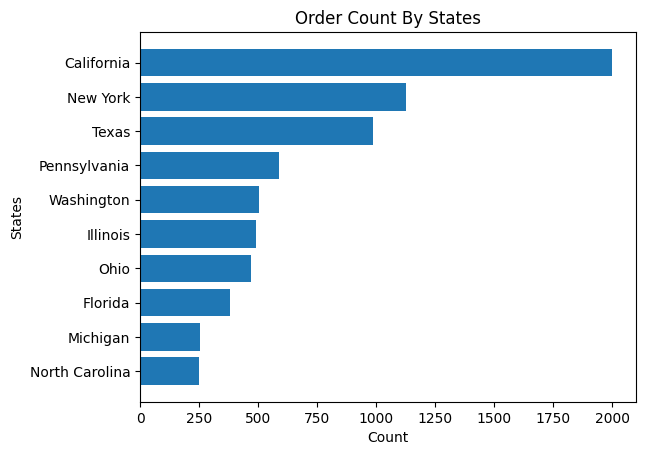

Note: "California" is the top state from where supermarket is geting the orders with order count : 2001


In [9]:
x= np.array(grouped_data.tail(10)['State'])
y= np.array(grouped_data.tail(10)['Row ID'])
plt.barh(x, y)
plt.xlabel('Count')
plt.ylabel('States')
plt.title('Order Count By States')
plt.show()
print(f'Note: "{grouped_data.iloc[-1]['State']}" is the top state from where supermarket is geting the orders with order count : {grouped_data.iloc[-1]['Row ID']}')

<h2 style="text-align:center;border:2px solid black;font-size:16px;font-weight:400;padding:8px;border-radius:10px;">
    By Regions
</h2>

In [10]:
df['Region'].unique()

['South', 'West', 'Central', 'East']
Categories (4, object): ['Central', 'East', 'South', 'West']

In [11]:
grouped_data = df.groupby(['Country','Region'],observed=False).agg({
    'Row ID':'count'
}).reset_index()

grouped_data

,Country,Region,Row ID
0,United States,Central,2323
1,United States,East,2848
2,United States,South,1620
3,United States,West,3203


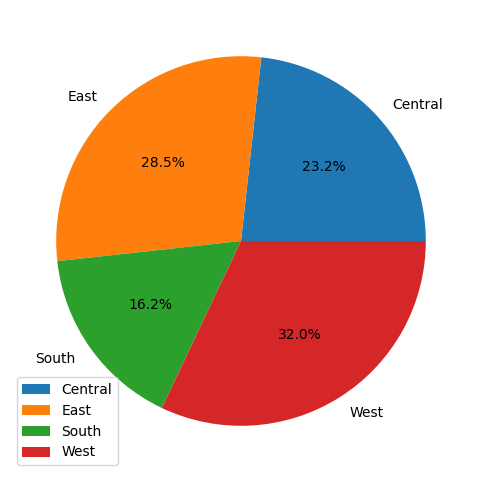

In [12]:
y = np.array(grouped_data['Row ID'])
mylabels =  np.array(grouped_data['Region'])
plt.figure(figsize=(15, 6))
plt.pie(y, labels = mylabels, autopct = '%1.1f%%')
plt.legend(mylabels, loc="best")
plt.show()

<h2 style="text-align:center;border:2px solid black;font-size:16px;font-weight:400;padding:8px;border-radius:10px;">
    By City-State
</h2>

In [13]:
grouped_data = df.groupby(['State', 'City']).size().reset_index(name='OrderCount').sort_values('OrderCount', ascending=False)
grouped_data=grouped_data.head(10)

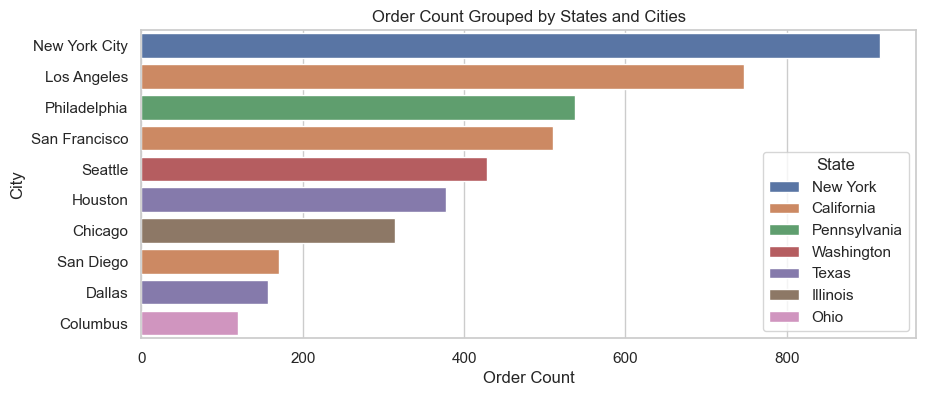

In [14]:
# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 4))
sns.barplot(x='OrderCount', y='City', hue='State', data=grouped_data)
plt.title('Order Count Grouped by States and Cities')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.legend(title='State')
plt.show()